# House Price Prediction with Keras (DNN)

## Using Pandas and Matplotlib for Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns =None

In [2]:
training = pd.read_csv("train.csv")
testing = pd.read_csv('test.csv')
Id = testing[['Id']].values # we need to keep it for the submission file
training = training.drop(['Id'],axis = 1)
testing = testing.drop(['Id'],axis =1)


In [3]:
testing.shape

(1459, 79)

In [4]:
training.shape

(1460, 80)

In [5]:
training.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
training['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

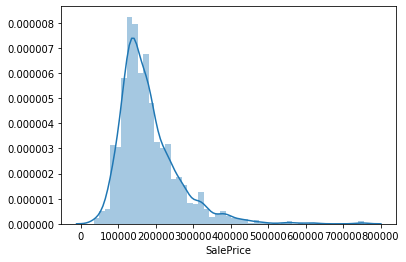

In [7]:
sns.distplot(training['SalePrice'])

Analyzing Skewness and Kurtosis

In [8]:
print("Skewness: %f" % training['SalePrice'].skew())
print("Kurtosis: %f" % training['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [ ]:
The correlation matrix is one of the most useful visualization tools 

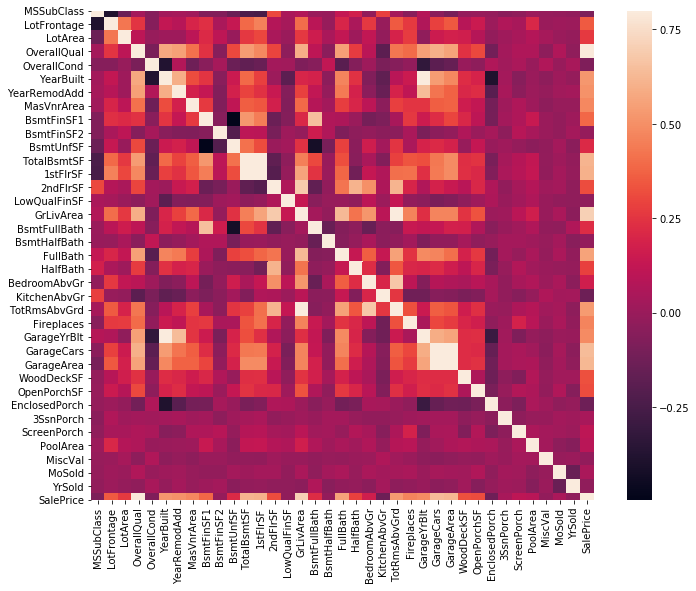

In [9]:
# Correlation Matrix
corrmat = training.corr()
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,vmax = .8,square = True)

In [10]:
# check correlation between sales price and numercial fields
# then check for variance between sales price and categorical fields

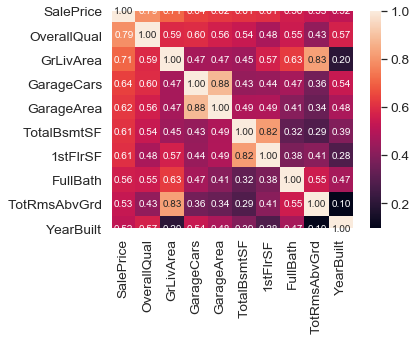

In [11]:
# https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
k = 10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(training[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar = True, annot = True, square = True, fmt = '.2f',
                annot_kws = {'size':10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

The correlation matrix above shows us the top 10 most correlated numerical variables in the dataset.
- Look at the variables Garage Cars and Garage Area. We can infer that The amount of cars able to fit in the garage is a consequence of the sqf of the garage. so Lets keep the one with higher correlation.
- Drop garage area

## Selecting Features

In [12]:
# Take only top ten variables correlation coef
t_numeric = training[corrmat.nlargest(k,'SalePrice')['SalePrice'].index]# defining column selection

In [13]:
t_numeric.head() 

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,208500,7,1710,2,548,856,856,2,8,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976
2,223500,7,1786,2,608,920,920,2,6,2001
3,140000,7,1717,3,642,756,961,1,7,1915
4,250000,8,2198,3,836,1145,1145,2,9,2000
...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999
1456,210000,6,2073,2,500,1542,2073,2,7,1978
1457,266500,7,2340,1,252,1152,1188,2,9,1941
1458,142125,5,1078,1,240,1078,1078,1,5,1950


In [14]:
t_categorical = training.select_dtypes(include= 'object')

In [15]:
t_categorical['SalePrice'] = training['SalePrice']

/Users/franciscoromero/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The correlation ratio allows us to compute a score describing the relationship between a categorical variable and a
numerical one. 

source: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

In [16]:

def correlation_ratio(categories, measurements):
        fcat, _ = pd.factorize(categories)
        cat_num = np.max(fcat)+1
        y_avg_array = np.zeros(cat_num)
        n_array = np.zeros(cat_num)
        for i in range(0,cat_num):
            cat_measures = measurements[np.argwhere(fcat == i).flatten()]
            n_array[i] = len(cat_measures)
            y_avg_array[i] = np.average(cat_measures)
        y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
        numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
        denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
        if numerator == 0:
            eta = 0.0
        else:
            eta = numerator/denominator
        return eta

In [21]:
for column in t_categorical:
    
    if correlation_ratio(t_categorical[column],t_categorical['SalePrice']) > 0.4:
        print(column)
        print(correlation_ratio(t_categorical[column],t_categorical['SalePrice']))


Neighborhood
0.5455749908095631
ExterQual
0.4773877777270065
BsmtQual
0.4413689593100486
KitchenQual
0.45659862444453825
SalePrice
0.9999999999999998


In [22]:
# According to this findings we are going to use only this categories in our new dataset
t_categorical = t_categorical[['Neighborhood','ExterQual','BsmtQual','KitchenQual']]  

In [23]:
training = pd.concat([t_numeric,t_categorical],axis =1)

In [24]:
training.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,Neighborhood,ExterQual,BsmtQual,KitchenQual
0,208500,7,1710,2,548,856,856,2,8,2003,CollgCr,Gd,Gd,Gd
1,181500,6,1262,2,460,1262,1262,2,6,1976,Veenker,TA,Gd,TA
2,223500,7,1786,2,608,920,920,2,6,2001,CollgCr,Gd,Gd,Gd
3,140000,7,1717,3,642,756,961,1,7,1915,Crawfor,TA,TA,Gd
4,250000,8,2198,3,836,1145,1145,2,9,2000,NoRidge,Gd,Gd,Gd


In [25]:
training.shape

(1460, 14)

In [26]:
testing.shape

(1459, 79)

## Handling Missing Data

In [27]:
# Keep in mind that this data set has many features and some of them have most of their data missing
# In this case we are going to handle missing data in a simple way.

total = training.isnull().sum().sort_values(ascending=False)
percent = (training.isnull().sum()/training.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30) 

# We can see the features with the most missing values
# Folowing the kaggle article "Comprehensive Data Exploration with Python" 
# eliminate columns that have more than 1 data missing 
# this is a simple but not the best approach since with some extra work filling missing values in the correct way
# can help with increasing the accuracy of the model

# below are out selected features and correspoding missing values

,Total,Percent
BsmtQual,37,0.025342
KitchenQual,0,0.000000
ExterQual,0,0.000000
Neighborhood,0,0.000000
YearBuilt,0,0.000000
TotRmsAbvGrd,0,0.000000
FullBath,0,0.000000
1stFlrSF,0,0.000000
TotalBsmtSF,0,0.000000
GarageArea,0,0.000000


In [29]:
# Drop the columns containing more than one missing value
# you can choose to leave it and fill the missing fata with the mode since less than 15% is missing 
training= training.drop((missing_data[missing_data['Total']>1]).index,1)
training.isnull().sum().max()

0

In [30]:
training.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,Neighborhood,ExterQual,KitchenQual
0,208500,7,1710,2,548,856,856,2,8,2003,CollgCr,Gd,Gd
1,181500,6,1262,2,460,1262,1262,2,6,1976,Veenker,TA,TA
2,223500,7,1786,2,608,920,920,2,6,2001,CollgCr,Gd,Gd
3,140000,7,1717,3,642,756,961,1,7,1915,Crawfor,TA,Gd
4,250000,8,2198,3,836,1145,1145,2,9,2000,NoRidge,Gd,Gd


In [31]:
testing.shape

(1459, 79)

In [33]:
# for the test data I will remove the comlums that were removed from the training data. We need to do this
# since out model needs the same features to predeict the prices.

Y_training = training[['SalePrice']] # Our label
training = training.drop(['SalePrice'],axis = 1) # our Features


In [34]:

mylist = training.columns # columns that we want to keep in the testing data
mylist = mylist.values 


In [35]:
testing = testing[mylist] # filter testing data to have only the desired columns

In [54]:
testing.isna().sum() # check for null values again

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
Neighborhood    0
ExterQual       0
KitchenQual     0
dtype: int64

In [81]:
#For this test I will just drop those columns

In [46]:
testing['KitchenQual']=testing['KitchenQual'].fillna(testing['KitchenQual'].mode()[0])

In [48]:
testing['TotalBsmtSF'] =testing['TotalBsmtSF'].fillna(testing['TotalBsmtSF'].mean())

In [49]:
testing.drop(['GarageArea'], axis =1, inplace =True)
training.drop(['GarageArea'], axis = 1, inplace = True)

In [53]:
testing['GarageCars'] =testing['GarageCars'].fillna(testing['GarageCars'].mode()[0])

In [55]:
testing.shape   

(1459, 11)

In [56]:
training.shape

(1460, 11)

In [57]:
Y_training.shape

(1460, 1)

In [58]:
Id.shape

(1459, 1)

Dummy Variables: Dumies allow our model to better interpret categorical variables by converting them in
simple (1,0) variables. 
e.g A categorical column with 3 categories such as: low medium high will be converted into 3 new comlumns where
1 will indicate the precense of such category and 0 its absence.

In [59]:
# Getting Dummy variables for the model to be processed by our neural net
training = pd.get_dummies(training)
testing = pd.get_dummies(testing)

In [60]:
# Check the head and notice the one hot (dummies) as explained above

training.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,7,1710,2,856,856,2,8,2003,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,6,1262,2,1262,1262,2,6,1976,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,7,1786,2,920,920,2,6,2001,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,7,1717,3,756,961,1,7,1915,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,8,2198,3,1145,1145,2,9,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [61]:
# Check the head of testing too.

testing.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,5,896,1.0,882.0,896,1,5,1961,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,6,1329,1.0,1329.0,1329,1,6,1958,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,5,1629,2.0,928.0,928,2,6,1997,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,6,1604,2.0,926.0,926,2,7,1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,8,1280,2.0,1280.0,1280,2,5,1992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [62]:
# Notice that I check the shape repeteadly. I do this to track any mistake when handling the data set 
# In case of a shape discrepancy I will go back to see what I did wrong.

testing.shape

(1459, 41)

In [63]:
training.shape

(1460, 41)

## Scaling The Data

In [64]:
## Convert the train and test data in to np arrays to work as input for the neural net
# Traininng data X and Y
X_training = training.values
X_training = X_training.astype(np.float)
Y_training = Y_training.values
Y_training = Y_training.astype(np.float)

# Testing Data X there is no Y since it is what we want to predict

X_testing = testing.values
X_testing = X_testing.astype(np.float)



Using MinMax Scaler or Standard Scaker from scikit learn package makes it easy to normalize our data

In [65]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler(feature_range=(0,1))
Y_scaler = MinMaxScaler(feature_range=(0,1))

X_scaled_training = X_scaler.fit_transform(X_training)
Y_scaled_training = Y_scaler.fit_transform(Y_training)

X_scaled_testing = X_scaler.transform(X_testing)

In [66]:
# To scale the data back we need to keep this constants
print(Y_scaler.scale_[0], Y_scaler.min_[0]) 

1.3886960144424386e-06 -0.048465490904041106


In [67]:
# Checking the shape of X and Y they must have the same number of rows
X_scaled_training.shape

(1460, 41)

In [68]:
Y_scaled_training.shape

(1460, 1)

In [69]:
X_scaled_testing.shape

(1459, 41)

## Building The Model

Keras a high level API written on top of TensorFlow and it is extremely beginner friendly. It has built in layers, activation functions optimizers and performance metrics and it works like a charm.

To begin you can import from tensorflow.keras layers, this will make your code look a little cleaner.

In [70]:
from tensorflow.keras import layers

For this regression problem we are going to use fully connected layers in other words "Dense" layers.
Activation function ReLu which means Rectified Linear units

In [77]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(256, activation='relu',input_shape=[41]),
        layers.Dense(128,activation = 'relu'),
        layers.Dense(64,activation = 'relu'),
        layers.Dense(1, activation = 'linear')
    ])
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer = optimizer ,
                 loss = 'mse',
                 metrics =['mae','mse'])
    return model


In [78]:
model= build_model()

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               10752     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 51,969
Trainable params: 51,969
Non-trainable params: 0
_________________________________________________________________


## Fitting The Model

In [80]:
from tensorflow import keras
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [81]:
# Early stoping helps prevent overfitting by stoping training when the validation score does not improve
# patience means the amount of epochs that have to elapse w/o improvement for the call back to stop the training

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 20)

In [82]:
history = model.fit(X_scaled_training,Y_scaled_training,epochs = 500, validation_split = 0.2,verbose =2, 
          callbacks = [tfdocs.modeling.EpochDots()] )

Train on 1168 samples, validate on 292 samples
Epoch 1/500

Epoch: 0, loss:0.0128,  mae:0.0728,  mse:0.0128,  val_loss:0.0038,  val_mae:0.0378,  val_mse:0.0038,  
.1168/1168 - 2s - loss: 0.0128 - mae: 0.0728 - mse: 0.0128 - val_loss: 0.0038 - val_mae: 0.0378 - val_mse: 0.0038
Epoch 2/500
.1168/1168 - 0s - loss: 0.0028 - mae: 0.0361 - mse: 0.0028 - val_loss: 0.0032 - val_mae: 0.0333 - val_mse: 0.0032
Epoch 3/500
.1168/1168 - 0s - loss: 0.0023 - mae: 0.0320 - mse: 0.0023 - val_loss: 0.0036 - val_mae: 0.0409 - val_mse: 0.0036
Epoch 4/500
.1168/1168 - 0s - loss: 0.0019 - mae: 0.0297 - mse: 0.0019 - val_loss: 0.0027 - val_mae: 0.0304 - val_mse: 0.0027
Epoch 5/500
.1168/1168 - 0s - loss: 0.0017 - mae: 0.0276 - mse: 0.0017 - val_loss: 0.0028 - val_mae: 0.0338 - val_mse: 0.0028
Epoch 6/500
.1168/1168 - 0s - loss: 0.0016 - mae: 0.0273 - mse: 0.0016 - val_loss: 0.0026 - val_mae: 0.0311 - val_mse: 0.0026
Epoch 7/500
.1168/1168 - 0s - loss: 0.0016 - mae: 0.0276 - mse: 0.0016 - val_loss: 0.0026 - v

Epoch 63/500
.1168/1168 - 1s - loss: 7.3549e-04 - mae: 0.0186 - mse: 7.3549e-04 - val_loss: 0.0022 - val_mae: 0.0280 - val_mse: 0.0022
Epoch 64/500
.1168/1168 - 0s - loss: 7.8168e-04 - mae: 0.0195 - mse: 7.8168e-04 - val_loss: 0.0024 - val_mae: 0.0300 - val_mse: 0.0024
Epoch 65/500
.1168/1168 - 1s - loss: 7.6705e-04 - mae: 0.0191 - mse: 7.6705e-04 - val_loss: 0.0025 - val_mae: 0.0305 - val_mse: 0.0025
Epoch 66/500
.1168/1168 - 0s - loss: 7.3917e-04 - mae: 0.0187 - mse: 7.3917e-04 - val_loss: 0.0024 - val_mae: 0.0301 - val_mse: 0.0024
Epoch 67/500
.1168/1168 - 0s - loss: 7.5361e-04 - mae: 0.0197 - mse: 7.5361e-04 - val_loss: 0.0023 - val_mae: 0.0290 - val_mse: 0.0023
Epoch 68/500
.1168/1168 - 0s - loss: 7.8056e-04 - mae: 0.0194 - mse: 7.8056e-04 - val_loss: 0.0026 - val_mae: 0.0321 - val_mse: 0.0026
Epoch 69/500
.1168/1168 - 0s - loss: 8.2721e-04 - mae: 0.0202 - mse: 8.2721e-04 - val_loss: 0.0023 - val_mae: 0.0289 - val_mse: 0.0023
Epoch 70/500
.1168/1168 - 0s - loss: 8.1073e-04 - mae: 

Epoch 123/500
.1168/1168 - 0s - loss: 5.7401e-04 - mae: 0.0169 - mse: 5.7401e-04 - val_loss: 0.0022 - val_mae: 0.0296 - val_mse: 0.0022
Epoch 124/500
.1168/1168 - 0s - loss: 6.1236e-04 - mae: 0.0168 - mse: 6.1236e-04 - val_loss: 0.0022 - val_mae: 0.0296 - val_mse: 0.0022
Epoch 125/500
.1168/1168 - 0s - loss: 5.5936e-04 - mae: 0.0160 - mse: 5.5936e-04 - val_loss: 0.0024 - val_mae: 0.0321 - val_mse: 0.0024
Epoch 126/500
.1168/1168 - 1s - loss: 7.6864e-04 - mae: 0.0203 - mse: 7.6864e-04 - val_loss: 0.0024 - val_mae: 0.0321 - val_mse: 0.0024
Epoch 127/500
.1168/1168 - 0s - loss: 7.2749e-04 - mae: 0.0189 - mse: 7.2749e-04 - val_loss: 0.0021 - val_mae: 0.0293 - val_mse: 0.0021
Epoch 128/500
.1168/1168 - 0s - loss: 6.4278e-04 - mae: 0.0178 - mse: 6.4278e-04 - val_loss: 0.0025 - val_mae: 0.0305 - val_mse: 0.0025
Epoch 129/500
.1168/1168 - 0s - loss: 5.3440e-04 - mae: 0.0158 - mse: 5.3440e-04 - val_loss: 0.0023 - val_mae: 0.0302 - val_mse: 0.0023
Epoch 130/500
.1168/1168 - 0s - loss: 5.6263e-04

Epoch 184/500
.1168/1168 - 0s - loss: 4.1306e-04 - mae: 0.0135 - mse: 4.1306e-04 - val_loss: 0.0023 - val_mae: 0.0307 - val_mse: 0.0023
Epoch 185/500
.1168/1168 - 0s - loss: 4.5999e-04 - mae: 0.0140 - mse: 4.5999e-04 - val_loss: 0.0024 - val_mae: 0.0321 - val_mse: 0.0024
Epoch 186/500
.1168/1168 - 0s - loss: 4.4417e-04 - mae: 0.0143 - mse: 4.4417e-04 - val_loss: 0.0025 - val_mae: 0.0309 - val_mse: 0.0025
Epoch 187/500
.1168/1168 - 0s - loss: 3.9595e-04 - mae: 0.0130 - mse: 3.9595e-04 - val_loss: 0.0023 - val_mae: 0.0308 - val_mse: 0.0023
Epoch 188/500
.1168/1168 - 0s - loss: 3.8899e-04 - mae: 0.0132 - mse: 3.8899e-04 - val_loss: 0.0024 - val_mae: 0.0314 - val_mse: 0.0024
Epoch 189/500
.1168/1168 - 0s - loss: 3.8131e-04 - mae: 0.0130 - mse: 3.8131e-04 - val_loss: 0.0024 - val_mae: 0.0306 - val_mse: 0.0024
Epoch 190/500
.1168/1168 - 0s - loss: 3.9316e-04 - mae: 0.0129 - mse: 3.9316e-04 - val_loss: 0.0022 - val_mae: 0.0300 - val_mse: 0.0022
Epoch 191/500
.1168/1168 - 0s - loss: 3.9456e-04

Epoch 244/500
.1168/1168 - 1s - loss: 3.4115e-04 - mae: 0.0124 - mse: 3.4115e-04 - val_loss: 0.0022 - val_mae: 0.0298 - val_mse: 0.0022
Epoch 245/500
.1168/1168 - 1s - loss: 3.0655e-04 - mae: 0.0116 - mse: 3.0655e-04 - val_loss: 0.0023 - val_mae: 0.0313 - val_mse: 0.0023
Epoch 246/500
.1168/1168 - 1s - loss: 4.3054e-04 - mae: 0.0140 - mse: 4.3054e-04 - val_loss: 0.0024 - val_mae: 0.0317 - val_mse: 0.0024
Epoch 247/500
.1168/1168 - 0s - loss: 4.8535e-04 - mae: 0.0156 - mse: 4.8535e-04 - val_loss: 0.0022 - val_mae: 0.0302 - val_mse: 0.0022
Epoch 248/500
.1168/1168 - 1s - loss: 3.8951e-04 - mae: 0.0130 - mse: 3.8951e-04 - val_loss: 0.0023 - val_mae: 0.0299 - val_mse: 0.0023
Epoch 249/500
.1168/1168 - 0s - loss: 3.8432e-04 - mae: 0.0127 - mse: 3.8432e-04 - val_loss: 0.0024 - val_mae: 0.0312 - val_mse: 0.0024
Epoch 250/500
.1168/1168 - 1s - loss: 4.6860e-04 - mae: 0.0142 - mse: 4.6860e-04 - val_loss: 0.0023 - val_mae: 0.0305 - val_mse: 0.0023
Epoch 251/500
.1168/1168 - 1s - loss: 3.9383e-04

Epoch 304/500
.1168/1168 - 0s - loss: 2.8646e-04 - mae: 0.0110 - mse: 2.8646e-04 - val_loss: 0.0023 - val_mae: 0.0308 - val_mse: 0.0023
Epoch 305/500
.1168/1168 - 1s - loss: 3.5709e-04 - mae: 0.0126 - mse: 3.5709e-04 - val_loss: 0.0022 - val_mae: 0.0304 - val_mse: 0.0022
Epoch 306/500
.1168/1168 - 1s - loss: 3.4575e-04 - mae: 0.0128 - mse: 3.4575e-04 - val_loss: 0.0021 - val_mae: 0.0291 - val_mse: 0.0021
Epoch 307/500
.1168/1168 - 1s - loss: 2.8760e-04 - mae: 0.0112 - mse: 2.8760e-04 - val_loss: 0.0022 - val_mae: 0.0308 - val_mse: 0.0022
Epoch 308/500
.1168/1168 - 1s - loss: 2.9240e-04 - mae: 0.0113 - mse: 2.9240e-04 - val_loss: 0.0022 - val_mae: 0.0299 - val_mse: 0.0022
Epoch 309/500
.1168/1168 - 0s - loss: 3.7719e-04 - mae: 0.0129 - mse: 3.7719e-04 - val_loss: 0.0022 - val_mae: 0.0306 - val_mse: 0.0022
Epoch 310/500
.1168/1168 - 0s - loss: 2.7617e-04 - mae: 0.0112 - mse: 2.7617e-04 - val_loss: 0.0022 - val_mae: 0.0306 - val_mse: 0.0022
Epoch 311/500
.1168/1168 - 0s - loss: 3.0639e-04

Epoch 365/500
.1168/1168 - 0s - loss: 2.2497e-04 - mae: 0.0096 - mse: 2.2497e-04 - val_loss: 0.0020 - val_mae: 0.0287 - val_mse: 0.0020
Epoch 366/500
.1168/1168 - 0s - loss: 2.6050e-04 - mae: 0.0107 - mse: 2.6050e-04 - val_loss: 0.0022 - val_mae: 0.0298 - val_mse: 0.0022
Epoch 367/500
.1168/1168 - 0s - loss: 4.1039e-04 - mae: 0.0123 - mse: 4.1039e-04 - val_loss: 0.0023 - val_mae: 0.0308 - val_mse: 0.0023
Epoch 368/500
.1168/1168 - 0s - loss: 3.8749e-04 - mae: 0.0132 - mse: 3.8749e-04 - val_loss: 0.0024 - val_mae: 0.0310 - val_mse: 0.0024
Epoch 369/500
.1168/1168 - 0s - loss: 2.7840e-04 - mae: 0.0107 - mse: 2.7840e-04 - val_loss: 0.0022 - val_mae: 0.0305 - val_mse: 0.0022
Epoch 370/500
.1168/1168 - 1s - loss: 2.7810e-04 - mae: 0.0115 - mse: 2.7810e-04 - val_loss: 0.0021 - val_mae: 0.0298 - val_mse: 0.0021
Epoch 371/500
.1168/1168 - 0s - loss: 2.9523e-04 - mae: 0.0113 - mse: 2.9523e-04 - val_loss: 0.0022 - val_mae: 0.0299 - val_mse: 0.0022
Epoch 372/500
.1168/1168 - 0s - loss: 2.9451e-04

Epoch 425/500
.1168/1168 - 0s - loss: 2.0457e-04 - mae: 0.0090 - mse: 2.0457e-04 - val_loss: 0.0021 - val_mae: 0.0290 - val_mse: 0.0021
Epoch 426/500
.1168/1168 - 0s - loss: 2.4218e-04 - mae: 0.0101 - mse: 2.4218e-04 - val_loss: 0.0022 - val_mae: 0.0297 - val_mse: 0.0022
Epoch 427/500
.1168/1168 - 1s - loss: 1.8893e-04 - mae: 0.0089 - mse: 1.8893e-04 - val_loss: 0.0022 - val_mae: 0.0300 - val_mse: 0.0022
Epoch 428/500
.1168/1168 - 0s - loss: 2.6434e-04 - mae: 0.0108 - mse: 2.6434e-04 - val_loss: 0.0020 - val_mae: 0.0296 - val_mse: 0.0020
Epoch 429/500
.1168/1168 - 0s - loss: 2.1348e-04 - mae: 0.0091 - mse: 2.1348e-04 - val_loss: 0.0022 - val_mae: 0.0311 - val_mse: 0.0022
Epoch 430/500
.1168/1168 - 0s - loss: 2.9670e-04 - mae: 0.0111 - mse: 2.9670e-04 - val_loss: 0.0023 - val_mae: 0.0321 - val_mse: 0.0023
Epoch 431/500
.1168/1168 - 0s - loss: 2.8651e-04 - mae: 0.0109 - mse: 2.8651e-04 - val_loss: 0.0022 - val_mae: 0.0301 - val_mse: 0.0022
Epoch 432/500
.1168/1168 - 1s - loss: 2.3530e-04

Epoch 486/500
.1168/1168 - 0s - loss: 1.6986e-04 - mae: 0.0081 - mse: 1.6986e-04 - val_loss: 0.0021 - val_mae: 0.0302 - val_mse: 0.0021
Epoch 487/500
.1168/1168 - 0s - loss: 1.5488e-04 - mae: 0.0078 - mse: 1.5488e-04 - val_loss: 0.0021 - val_mae: 0.0301 - val_mse: 0.0021
Epoch 488/500
.1168/1168 - 0s - loss: 1.8077e-04 - mae: 0.0086 - mse: 1.8077e-04 - val_loss: 0.0024 - val_mae: 0.0327 - val_mse: 0.0024
Epoch 489/500
.1168/1168 - 1s - loss: 1.8734e-04 - mae: 0.0088 - mse: 1.8734e-04 - val_loss: 0.0022 - val_mae: 0.0313 - val_mse: 0.0022
Epoch 490/500
.1168/1168 - 0s - loss: 1.7578e-04 - mae: 0.0088 - mse: 1.7578e-04 - val_loss: 0.0020 - val_mae: 0.0294 - val_mse: 0.0020
Epoch 491/500
.1168/1168 - 0s - loss: 1.9387e-04 - mae: 0.0088 - mse: 1.9387e-04 - val_loss: 0.0021 - val_mae: 0.0305 - val_mse: 0.0021
Epoch 492/500
.1168/1168 - 0s - loss: 1.9327e-04 - mae: 0.0091 - mse: 1.9327e-04 - val_loss: 0.0022 - val_mae: 0.0310 - val_mse: 0.0022
Epoch 493/500
.1168/1168 - 0s - loss: 1.9372e-04

In [ ]:
# Visualize Training progress

In [83]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.000350,0.012376,0.000350,0.002227,0.030596,0.002227,495
496,0.000250,0.010522,0.000250,0.002209,0.030691,0.002209,496
497,0.000193,0.009262,0.000193,0.002126,0.030919,0.002126,497
498,0.000267,0.010311,0.000267,0.002102,0.030397,0.002102,498
499,0.000205,0.009335,0.000205,0.002166,0.030271,0.002166,499


In [84]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [SalePrice]')

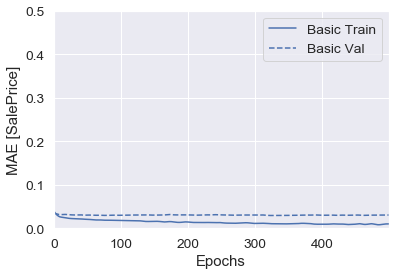

In [85]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 0.5])
plt.ylabel('MAE [SalePrice]')


In [99]:
# test_error_rate = model.evaluate(X_scaled_testing,Y_scaled_training,verbose = 2)
# print("The MSE for this data set is: {}".format(test_error_rate))

In [88]:
result = model.predict(X_scaled_testing)

In [89]:
result 

array([[0.10745479],
       [0.15235895],
       [0.1961506 ],
       ...,
       [0.14000282],
       [0.09084733],
       [0.19271514]], dtype=float32)

## Revert Scaling  of The Predicted Results

Note above that the results are comming out scaled. 
To scale back the results to the original scale of the data set we need the Y_scaler we 
computed earlier. Then, perform the oposite operations to scale back the data.

In [90]:
# re-scale the result to the original values

prediction = result + 0.048465490904041106
prediction = prediction / 1.3886960144424386e-06

In [91]:
prediction

array([[112278.195],
       [144613.69 ],
       [176148.05 ],
       ...,
       [135716.03 ],
       [100319.164],
       [173674.17 ]], dtype=float32)

In [92]:

prediction.shape

(1459, 1)

In [93]:
Id.shape

(1459, 1)

## Creating The Submission File

In [94]:
sub_df = pd.DataFrame({'Id':Id[:,0],'SalePrice':prediction[:,0]})

In [97]:
sub_df.isnull().sum()

Id           0
SalePrice    0
dtype: int64

In [98]:
sub_df.to_csv('Kaggle_House_Price_NN_13.csv',index = False)

## Notes

The first 3 submissions were pretty unsuccesful mainly for lack of good data wrangling. Too many uncorrelated features left adding unecessary complexity to the model. 
Number of nodes and layers can be improved. Node size will be changed to 512, 256 etc following the geometric 
series of 2.

Steps to improve this model:

- Go back to the section of feature selection and select features that have only possitive correlation.
- Feature engineering for this problem can be really useful but tedious given the large ammount of features.
- After a more careful feature selection I was able to significantly improve the score. from 0.5 to 0.18
